<a href="https://colab.research.google.com/github/MFSaavedra/QO/blob/main/entanglement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install thewalrus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.9 MB/s 


In [ ]:
#mport thewalrus as tw
import numpy as np
import scipy as sp
from thewalrus.symplectic import *

In [ ]:
# In the xxpp ordering
vac2=vacuum_state(2)
# Input is vacuum
hbar = 2
num_modes = 2


In [ ]:
S2 = expand(squeezing(0.5, 0),[0],2)*expand(squeezing(0.5, 0),[1],2) #separate squeezing
print(S2)
bs_list=[]
for theta in [i*np.pi/4 for i in np.arange(6)]:
  bs_list.append(beam_splitter(theta,np.pi/2)) 
#print(bs_list[1])

cov_list = [bs@S2@vac2[1]@S2.T@bs.T for bs in bs_list]
#print(cov_list[1])

[[ 0.60653066  0.         -0.          0.        ]
 [ 0.          0.60653066  0.         -0.        ]
 [-0.          0.          1.64872127  0.        ]
 [ 0.         -0.          0.          1.64872127]]


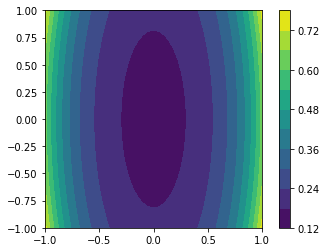

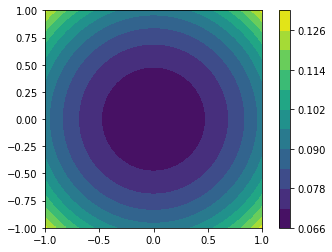

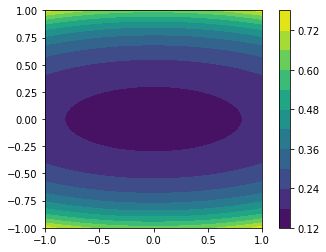

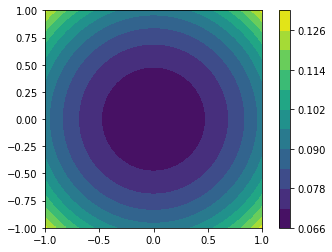

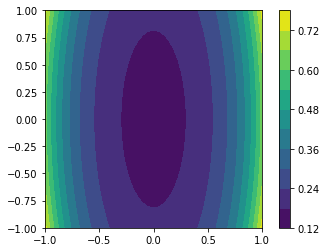

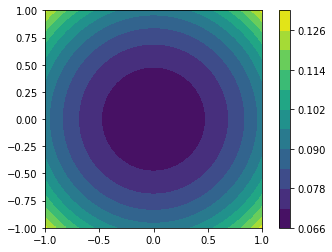

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from thewalrus.quantum import reduced_gaussian

#r canonical xxpp as before

def W(r,cov):
  return 1/(2*np.pi*np.linalg.det(cov))*np.exp(-0.5*r@np.linalg.inv(cov)@r.T)

def W2(r,cov):
  #Works with meshgrid
  return 1/(2*np.pi*np.linalg.det(cov))*np.exp(np.einsum('i...,ij,j...',r,np.linalg.inv(cov),r)/2)

r=np.linspace(-1,1)

Q, P = np.meshgrid(r,r)
mu = np.zeros([num_modes*2])
num_modes = 2

for cov in cov_list:
  mu1, cov1 = reduced_gaussian(mu, cov, [1]) 
  Z = W2([Q,P],cov1)
  #print(Z)
  plt.contourf(r,r,Z,10)
  plt.gca().set_aspect('equal', adjustable='box')
  plt.colorbar()
  plt.show()

#fig 3 a)
#queda igual 

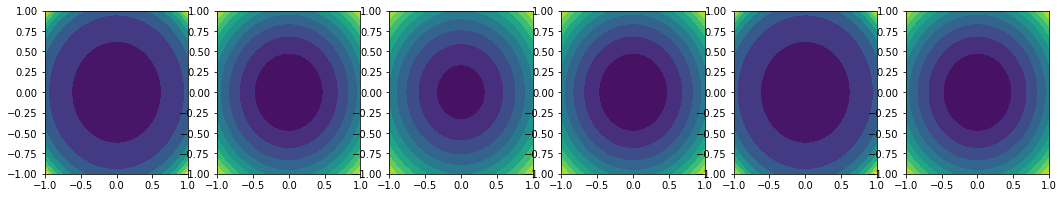

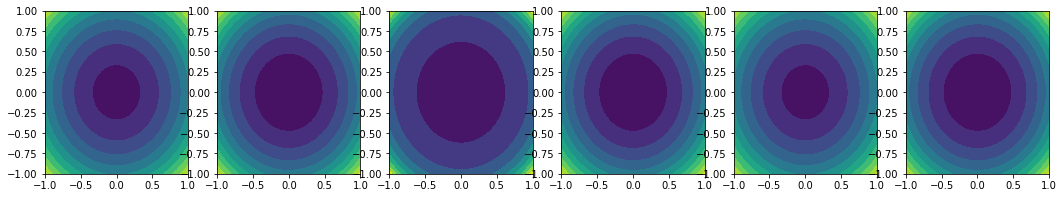

In [ ]:
fig, axs = plt.subplots(1,6,figsize=(18,3))

i=0
for cov in cov_list:
  #seleccionar q1 q2 de las correlaciones
  covQ = np.array(cov[:2,:2])
  Z = W2([Q,P],covQ)
  #print(Z)
  axs[i].contourf(r,r,Z,10)
  #plt.gca().set_aspect('equal', adjustable='box')
  #axs[i].colorbar()
  i+=1
plt.show()

fig, axs = plt.subplots(1,6,figsize=(18,3))

i=0
for cov in cov_list:
  #seleccionar p1 p2 de las correlaciones
  covP = np.array(cov[2:,2:])
  Z = W2([Q,P],covP)
  axs[i].contourf(r,r,Z,10)
  i+=1
plt.show()

#fig. 3 b) y c)
#es distinta

In [ ]:
#local time reflection in p2
ltr = np.identity(4)
ltr[3][3]=-1
print(ltr)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


In [ ]:
cov_list_reflected = [ltr@cov@ltr for cov in cov_list]
print(cov_list[3])
print(cov_list_reflected[3])

[[ 1.54308063e+00 -1.82537216e-34  7.19603190e-17  1.17520119e+00]
 [-3.83481109e-34  1.54308063e+00  1.17520119e+00 -7.19603190e-17]
 [ 7.19603190e-17  1.17520119e+00  1.54308063e+00 -6.52911753e-33]
 [ 1.17520119e+00 -7.19603190e-17  9.30690249e-33  1.54308063e+00]]
[[ 1.54308063e+00 -1.82537216e-34  7.19603190e-17 -1.17520119e+00]
 [-3.83481109e-34  1.54308063e+00  1.17520119e+00  7.19603190e-17]
 [ 7.19603190e-17  1.17520119e+00  1.54308063e+00  6.52911753e-33]
 [-1.17520119e+00  7.19603190e-17 -9.30690249e-33  1.54308063e+00]]


In [ ]:
#ver valores propios
from numpy.linalg import eigvalsh
evs=[eigvalsh(cov-complex(0,1)*sympmat(2)/2) for cov in cov_list_reflected]
print(evs)


[array([0.26593622, 0.26593622, 2.82022505, 2.82022505]), array([-0.13212056,  0.86787944,  2.21828183,  3.21828183]), array([0.26593622, 0.26593622, 2.82022505, 2.82022505]), array([-0.13212056,  0.86787944,  2.21828183,  3.21828183]), array([0.26593622, 0.26593622, 2.82022505, 2.82022505]), array([-0.13212056,  0.86787944,  2.21828183,  3.21828183])]


# 3 modos

In [ ]:
# In the xxpp ordering
vac3=vacuum_state(3)
print(vac3)
# Input is vacuum
hbar = 2
num_modes = 3


[array([0., 0., 0., 0., 0., 0.]), array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])]


In [ ]:
#Para generar el interferómetro con 3 modos
def H_gen(k):
  return -1*np.array([[0,k,0],[k,0,k],[0,k,0]])
from scipy.linalg import expm
def U(k):
  return expm(1j*H_gen(k))

from thewalrus.symplectic import interferometer
def V(k):
  return interferometer(U(k))

In [ ]:
S3 = expand(squeezing(1, 0),[0],3)@expand(squeezing(2, 0),[1],3)@expand(squeezing(1, 0),[2],3) #separate squeezing
#print(S)

#Hacer el optical trimer
bs_list=[]

#los angulos interesantes
at=np.arctan(np.sqrt(2))
for theta in np.array([at,np.pi-at,np.pi+at,2*np.pi-at])/np.sqrt(2):
  bs_list.append(V(theta)) 

cov_list = [bs@S3@vac3[1]@S3.T@bs.T for bs in bs_list]
print(np.round(cov_list[1],14))
cov1 = cov_list[0]

[[ 18.28960687   0.          18.15427158   0.         -18.15427158
    0.        ]
 [  0.           4.93214261   0.          -2.45691349   0.
   -2.45691349]
 [ 18.15427158   0.          18.28960687   0.         -18.15427158
    0.        ]
 [  0.          -2.45691349   0.           4.93214261   0.
   -2.45691349]
 [-18.15427158   0.         -18.15427158   0.          18.28960687
    0.        ]
 [  0.          -2.45691349   0.          -2.45691349   0.
    4.93214261]]


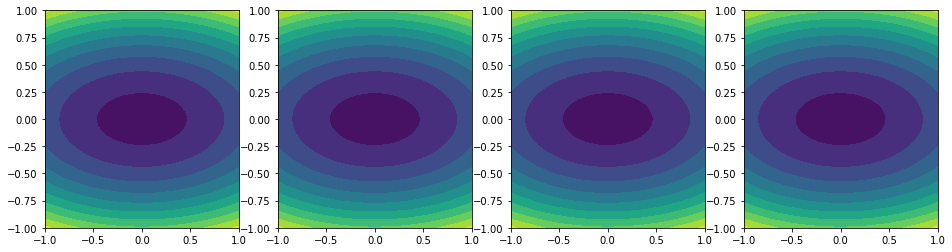

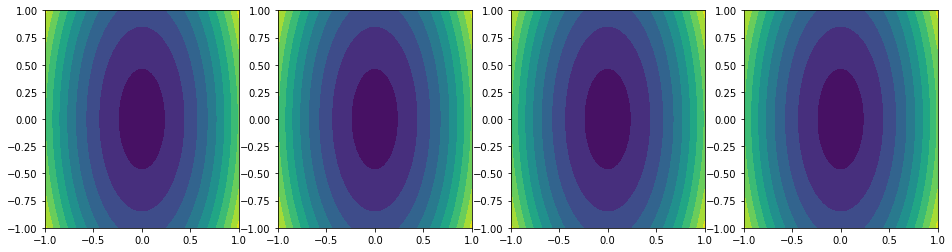

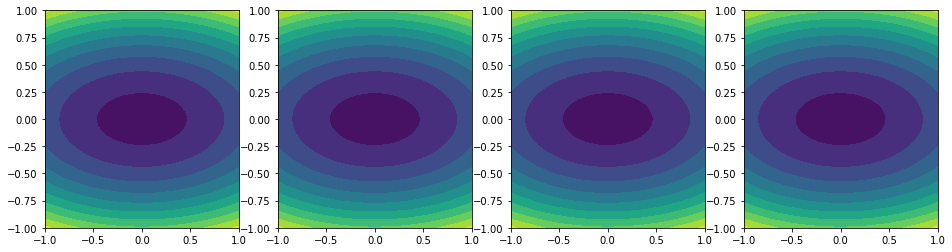

In [ ]:
#r canonical xxpp as before
r=np.linspace(-1,1)

Q, P = np.meshgrid(r,r)
mu = np.zeros([num_modes*2])
num_modes = 3

j=0
for mode in range(3):
  i=0
  fig, ax =plt.subplots(1,4,figsize=(16,4))

  for cov in cov_list:
    mu_r, cov_r = reduced_gaussian(mu, cov, [j]) 
    Z = W2([Q,P],cov_r)
    ax[i].contourf(r,r,Z,10)
    i+=1
  j+=1

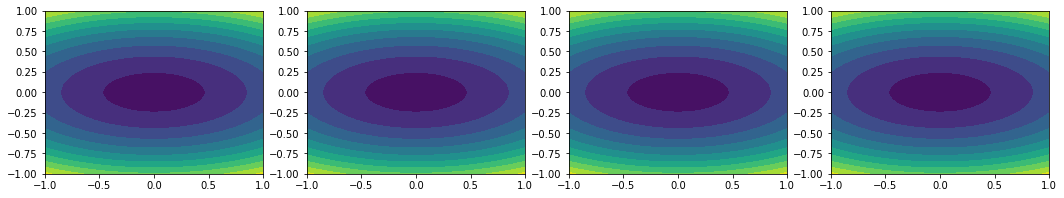

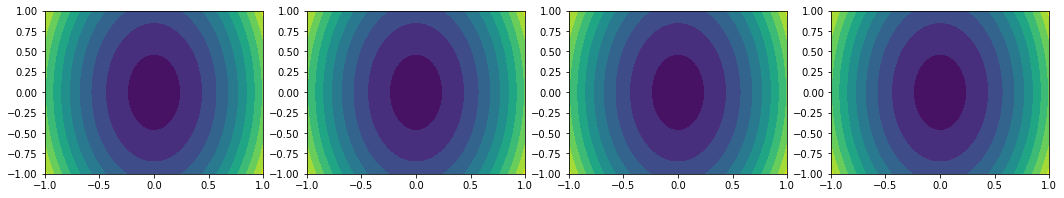

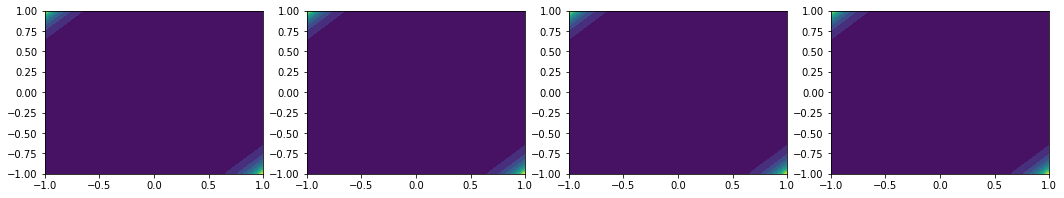

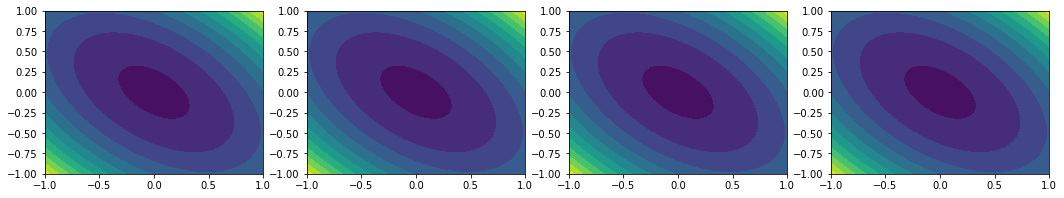

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(18,3))

i=0
for cov in cov_list:
  #seleccionar q1 q2 de las correlaciones
  covQ = np.array(cov[:2,:2])
  Z = W2([Q,P],covQ)
  axs[i].contourf(r,r,Z,10)
  i+=1
plt.show()

fig, axs = plt.subplots(1,4,figsize=(18,3))
covP = np.array(cov[:2,:2])
i=0
for cov in cov_list:
  #seleccionar p1 p2 de las correlaciones
  covP = np.array(cov[3:5,3:5])
  Z = W2([Q,P],covP)
  axs[i].contourf(r,r,Z,10)
  i+=1
plt.show()

fig, axs = plt.subplots(1,4,figsize=(18,3))
i=0
for cov in cov_list:
  #seleccionar q1 q3 de las correlaciones
  covP = np.array(cov[:3,:3])
  covP =np.delete(covP,1,0)
  covP =np.delete(covP,1,1)
  Z = W2([Q,P],covP)
  axs[i].contourf(r,r,Z,10)
  i+=1
plt.show()

fig, axs = plt.subplots(1,4,figsize=(18,3))
i=0
for cov in cov_list:
  #seleccionar p1 p3 de las correlaciones
  covP = np.array(cov[3:6,3:6])
  covP =np.delete(covP,1,0)
  covP =np.delete(covP,1,1)
  Z = W2([Q,P],covP)
  axs[i].contourf(r,r,Z,10)
  i+=1
plt.show()

In [ ]:
#local time reflection in p2
ltr = np.identity(6)
ltr[-1][-1]=-1
ltr

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.]])

In [ ]:
cov_list_reflected = [ltr@cov@ltr for cov in cov_list]

print(sympmat(3))

[[ 0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.]
 [-1. -0. -0.  0.  0.  0.]
 [-0. -1. -0.  0.  0.  0.]
 [-0. -0. -1.  0.  0.  0.]]


In [ ]:
evs=[eigvalsh(cov-complex(0,1)*sympmat(3)) for cov in cov_list_reflected]
print(evs)

[array([-8.74970120e-01,  3.33760797e-15,  1.01092366e+00,  7.38589804e+00,
        7.52439138e+00,  5.46190055e+01]), array([-8.74970120e-01,  5.67601521e-15,  1.01092366e+00,  7.38589804e+00,
        7.52439138e+00,  5.46190055e+01]), array([-8.74970120e-01, -1.20042865e-15,  1.01092366e+00,  7.38589804e+00,
        7.52439138e+00,  5.46190055e+01]), array([-8.74970120e-01, -6.52256027e-16,  1.01092366e+00,  7.38589804e+00,
        7.52439138e+00,  5.46190055e+01])]


In [ ]:
bs_test = expand(beam_splitter(1,np.pi/2),[0,1],3)@expand(beam_splitter(1,np.pi/2),[1,2],3)
in_cov = squeezing([1,1,1])
out_cov = ltr@(bs_test@in_cov@bs_test.T)@ltr
np.linalg.eigvalsh(out_cov-complex(0,1)*sympmat(3))

array([-5.82551668e-01,  1.94289029e-16,  1.04923551e+00,  2.03692576e+00,
        3.08616127e+00,  3.66871294e+00])

# fig 6
quiero un grafico que muestre los valores propios de la matriz densidad con una coordenada reflejada, variando el ángulo del interferometro.

In [ ]:
def H_gen(k):
  return -1*np.array([[0,k,0],[k,0,k],[0,k,0]])
from scipy.linalg import expm
def U(k):
  return expm(1j*H_gen(k))

from thewalrus.symplectic import interferometer
def V(k):
  return interferometer(U(k))

In [ ]:
theta_list = np.linspace(0,5*np.pi/4)
# Veremos los casos de 2 y 3 modos
bs_list2 = [beam_splitter(theta,np.pi/2) for theta in theta_list]
bs_list3 = [V(k) for k in theta_list]

S3 = expand(squeezing(0.5, 0),[0],3)@expand(squeezing(1, 0),[1],3)@expand(squeezing(0.5, 0),[2],3) #separate squeezing

cov_list2 = [bs@S2@S2.T@bs.T for bs in bs_list2]
cov_list3 = [bs@S3@S3.T@bs.T for bs in bs_list3]

ltr2 = np.identity(4)
ltr2[-1][-1]=-1
ltr3 = np.identity(6)
ltr3[-1][-1]=-1
ltr3_2 = np.identity(6)
ltr3_2[-2][-2]=-1

In [ ]:
evs2 = np.array([eigvalsh(ltr2@cov@ltr2-1j*sympmat(2)) for cov in cov_list2])
evs3 = np.array([eigvalsh(ltr3@cov@ltr3-1j*sympmat(3)) for cov in cov_list3])

# aca reflejamos sobre el segundo modo (el del medio) en vez del último
evs3_2 = np.array([eigvalsh(ltr3_2@cov@ltr3_2-1j*sympmat(3)) for cov in cov_list3])


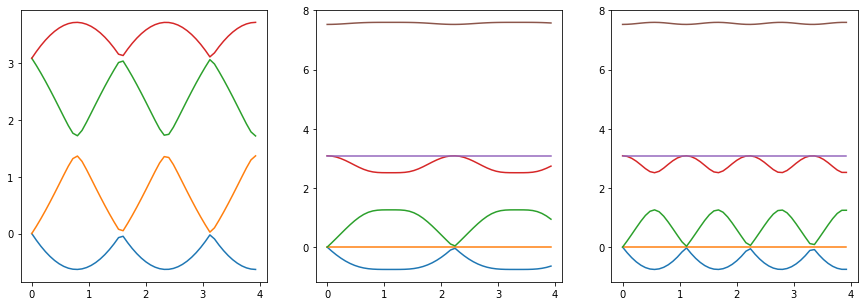

In [ ]:
f_eig, ax_eig = plt.subplots(1,3,figsize=(15,5))
ax_eig[0].plot(theta_list,evs2)
ax_eig[1].plot(theta_list,evs3)
ax_eig[2].plot(theta_list,evs3_2)
plt.show()
#aca hemos generado la figura 6,
#izq: valores propios cuando son 2 modos
#centro: vp para 3 modos, con local time reversal del p3
#der: : vp para 3 modos, con local time reversal del p2